# 収束

黒木玄

2018-04-18

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/01%20convergence.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#収束について" data-toc-modified-id="収束について-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>収束について</a></span><ul class="toc-item"><li><span><a href="#収束の定義" data-toc-modified-id="収束の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>収束の定義</a></span><ul class="toc-item"><li><span><a href="#数列の収束の定義" data-toc-modified-id="数列の収束の定義-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>数列の収束の定義</a></span></li><li><span><a href="#級数の収束の定義" data-toc-modified-id="級数の収束の定義-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>級数の収束の定義</a></span></li><li><span><a href="#函数の値の収束の定義" data-toc-modified-id="函数の値の収束の定義-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>函数の値の収束の定義</a></span></li></ul></li><li><span><a href="#収束の判定法の基本" data-toc-modified-id="収束の判定法の基本-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>収束の判定法の基本</a></span><ul class="toc-item"><li><span><a href="#はさみうち" data-toc-modified-id="はさみうち-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>はさみうち</a></span></li><li><span><a href="#二項定理の復習" data-toc-modified-id="二項定理の復習-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>二項定理の復習</a></span></li><li><span><a href="#多項式函数より指数函数の方が速く増加すること" data-toc-modified-id="多項式函数より指数函数の方が速く増加すること-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>多項式函数より指数函数の方が速く増加すること</a></span></li><li><span><a href="#指数函数より階乗の方が速く増加すること" data-toc-modified-id="指数函数より階乗の方が速く増加すること-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>指数函数より階乗の方が速く増加すること</a></span></li></ul></li><li><span><a href="#まとめ" data-toc-modified-id="まとめ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>まとめ</a></span></li></ul></li><li><span><a href="#上限と下限と上極限と下極限" data-toc-modified-id="上限と下限と上極限と下極限-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>上限と下限と上極限と下極限</a></span><ul class="toc-item"><li><span><a href="#上限と下限" data-toc-modified-id="上限と下限-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>上限と下限</a></span></li><li><span><a href="#上極限と下極限" data-toc-modified-id="上極限と下極限-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>上極限と下極限</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## 収束について

### 収束の定義

#### 数列の収束の定義

数列 $a_n$ が $n\to\infty$ で $\alpha$ に**収束する**とは, 任意の $\eps>0$ に対して, ある番号 $N$ が存在して, $N$ 以降のすべての番号 $n$ について $|a_n - \alpha| < \eps$ が成立することである.

$a_n$ が $\alpha$ に収束するとき, $a_n$ の極限の値を $\displaystyle \lim_{n\to\infty} a_n = \alpha$ と定義する.  収束しないときには極限の値は定義されない.

#### 級数の収束の定義

(無限)級数 $\ds\sum_{n=1}^\infty a_n$ の収束は数列 $\ds s_n = \sum_{k=1}^n a_k$ の収束で定義される. 収束するとき $\ds \sum_{n=1}^\infty a_n = \lim_{n\to\infty} \sum_{k=1}^n a_k$ と書く.

#### 函数の値の収束の定義

函数の $x$ における値 $f(x)$ が $x\to a$ で $\alpha$ に**収束する**とは, 任意の $\eps>0$ に対して, ある $\delta > 0$ が存在して, $0<|x-a|<\delta$ を満たすすべての $x$ について $|f(x)-\alpha|<\eps$ が成立することである.

$f(x)$ が $x\to a$ で $\alpha$ に収束するとき, その極限の値を $\displaystyle \lim_{x\to a} f(x) = \alpha$ と定義する.  収束しないときには極限の値は定義されない.

**注意:** 上の定義における $|f(x)-\alpha|<\eps$ を $|f(x)-\alpha|\leqq\eps$ に置き換えても同値な条件になる. $\QED$

**問題:** これはなぜか? $\QED$

### 収束の判定法の基本

#### はさみうち

**定理:** $A_n \leqq a_n \leqq B_n$ でかつ $A_n$ と $B_n$ が $\alpha$ に収束するならば $a_n$ も $\alpha$ に収束する. $\QED$

**定理:** $A_n \leqq a_n$ でかつ $A_n\to\infty$ ならば $a_n\to\infty$ となる. $\QED$

#### 二項定理の復習

二項係数を

$$
\binom{n}{k} = \frac{n(n-1)\cdots(n-k+1)}{k!}
$$

と定義する. 例えば

$$
\binom{n}{0} = 1, \quad
\binom{n}{1} = n, \quad
\binom{n}{2} = \frac{n(n-1)}{2}, \quad
\binom{n}{3} = \frac{n(n-1)(n-2)}{6}.
$$

$n$ も $k$ も非負の整数のとき $\binom{n}{k}$ は $n$ 個から $k$ 個選び出すときの場合の数に一致している. 高校数学では ${}_nC_k$ のように書いているようだが, 一般には $\binom{n}{k}$ と書くことの方が多いように感じられるので, $\binom{n}{k}$ の方を使用する.  (上の定義に従えば, $k$ が非負の整数でありさえすれば, $n$ が整数でなくても $\binom{n}{k}$ が定義されていることに注意せよ. この事実は二項展開を考えるときに必要になる.)

以上の記号法のもとで, 二項定理は

$$
(x+y)^n = \sum_{k=0}^n \binom{n}{k} x^{n-k}y^k
\tag{$*$}
$$

と書ける. 高校数学で証明を習っているはずだが, 忘れている人は二項定理を証明しておくこと. 

**考え方:** 解析学では不等式を扱いたい. しかし, 二項定理のような**良い等式は良い不等式を生み出す**ために非常に役に立つ. 解析学では非自明な等式は非自明な不等式を作る材料になる. 次の節の証明を見よ!

**二項定理の証明1:** $(x+y)^n$ を展開した結果の $x^{n-k}y^k$ の係数は $n-k$ 個の $x$ と $k$ 個の $y$ の並べ方の個数に等しい. その個数は全部で $n$ 個並べるうち $y$ を置く $k$ 個の場所の選び方の個数に等しい. それは

$$
\frac{n!}{k!(n-k)!} = \binom{n}{k}
$$

に等しい. $\QED$

**二項定理の証明2:** $n$ に関する帰納法を使う. $n=0$ の場合に($*$)は成立している. ($*$)が $n$ について成立していると仮定する. そのとき, $k$ が負の整数のとき $\binom{n}{k}=0$ と約束しておくと, 

$$
\begin{aligned}
\binom{n}{k-1} + \binom{n}{k} &= 
\frac{n(n-1)\cdots(n-k+2)}{(k-1)!} + \frac{n(n-1)\cdots(n-k+2)(n-k+1)}{k!}
\\ &=
\frac{n(n-1)\cdots(n-k+2)}{k!}\times(k+(n-k+1))
\\ &=
\frac{n(n-1)\cdots(n-k+2)}{k!}\times(n+1)
\\ &=
\binom{n+1}{k}.
\end{aligned}
$$

ゆえに $n$ に関する($*$)を使うと, 

$$
\begin{aligned}
(x+y)^{n+1} &= (x+y)(x+y)^n =
(x+y)\sum_{k=0}^n \binom{n}{k}x^{n-k}y^k
\\ &=
\sum_{k=0}^n \binom{n}{k}x^{n-k+1}y^k +
\sum_{k=0}^n \binom{n}{k}x^{n-k}y^{k+1}
\\ &=
\sum_{k=0}^{n+1} \binom{n}{k}x^{n-k+1}y^k +
\sum_{k=0}^{n+1} \binom{n}{k-1}x^{n-k+1}y^k
\\ &=
\sum_{k=0}^{n+1} \left(\binom{n}{k}+\binom{n}{k-1}\right)x^{n-k+1}y^k
\\ &=
\sum_{k=0}^{n+1} \binom{n+1}{k}x^{n-k+1}y^k
\end{aligned}
$$

と $n$ を $n+1$ で置き換えた場合の($*$)も成立することがわかる. これで示すべきことが示された. $\QED$

#### 多項式函数より指数函数の方が速く増加すること

**定理:** $a>1$ ならば $n\to\infty$ のとき $\ds\frac{n^l}{a^n}\to 0$. $\QED$

**証明:** 二項定理を使う.  

$L$ は $l$ より大きな正の整数であるとし, $n$ は $L$ 以上であると仮定する. 

そのとき特に $n\to\infty$ のとき $n^l/n^L\to 0$ が成立している.

$a>1$ なので $a=1+\alpha$, $\alpha>0$ と書ける.  二項定理より

$$
\begin{aligned}
a^n &= (1+\alpha)^n = \sum_{k=0}^n \binom{n}{k}\alpha^k =
\sum_{k=0}^n \frac{n(n-1)\cdots(n-k+1)}{k!}\alpha^2 
\\ &\geqq
\frac{n(n-1)\cdots(n-L+1)}{L!}\alpha^L
= n^L\frac{(1-1/n)\cdots(1-(L-1)/n)\alpha^L}{L!}.
\end{aligned}
$$

ゆえに, $n\to\infty$ のとき

$$
0\leqq\frac{n^l}{a^n} \leqq 
\frac{n^l}{n^L}\times\frac{L!}{(1-1/n)\cdots(1-(L-1)/n)\alpha^L} \to
0\times\frac{L!}{\alpha^L} = 0.
\qquad\QED
$$

**問題:** $a=1.01$, $l=100$ のとき, $n^l$ と $a^n$ の大きさを比較するためのグラフを描いてみよ.

**解答例:** 直接 $n^l$ と $a^n$ を扱うと数値が巨大になり過ぎるので, それらの対数を比較することにする.

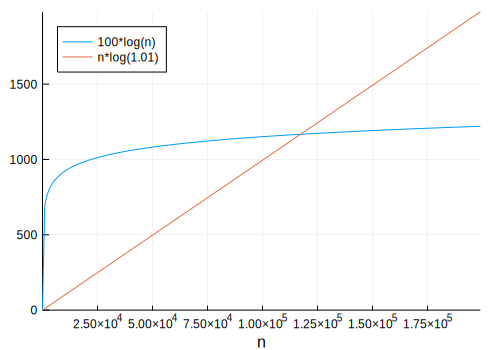

In [2]:
a = 1.01
l = 100
n = 1:10^3:2*10^5
f(n) = l*log(n)
g(n) = n*log(a)
plot(size=(500, 350), legend=:topleft, xlabel="n")
plot!(n, f.(n), label="$l*log(n)")
plot!(n, g.(n), label="n*log($a)")

**問題:** $a>1$ ならば, $x>0$ が連続的に幾らでも大きくなるとき $\ds\frac{x^l}{a^x}\to 0$ となることを示せ.

**証明:** 正の整数 $n$ について $n\leqq x \leqq n+1$ のとき, $x^l$ は $n^l$ と $(n+1)^l$ のあいだにあり, $a^x$ は $a^n$ 以上になる. ゆえに, $x\to\infty$ のとき, $n\to\infty$ となり, 

$$
0\leqq
\frac{x^l}{a^x} \leqq \frac{\max\{n^l, (n+1)^l\}}{a^n} \leqq 
\max\left\{ \frac{n^l}{a^n},\; a\frac{(n+1)^l}{a^{n+1}}\right\} \to 0.
$$

最後に上の方の定理を使った. これで示すべきことが示された. $\QED$

**問題:** $x>0$ について, $x\to 0$ のとき $x\log x\to 0$ となることを示せ.

**証明:** $x>0$ なので $x=e^{-t}$, $t\in\R$ と書ける. $x\to 0$ のとき $t\to\infty$ となるので,

$$
x\log x = e^{-t}\log e^{-t} = -\frac{t}{e^t} \to 0.
$$

最後の上の問題の結果を使った. $\QED$

**注意:** 統計学に出て来る計算では $0\log 0 = 0$ と約束しておくことが適切な場合が多い. $\QED$

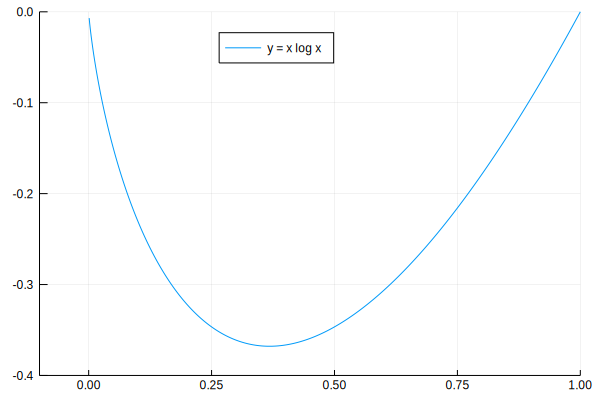

In [3]:
f(x) = x*log(x)
x = 0.001:0.001:1
plot(x, f.(x), xlim=(-0.1,1), ylim=(-0.4,0), label="y = x log x", legend=:top)

#### 指数函数より階乗の方が速く増加すること

**定理:** $a>0$ と仮定する. そのとき $n\to\infty$ ならば $\ds\frac{a^n}{n!}\to 0$ が成立する.

**証明:** $N$ を十分大きくすると $\ds\frac{a}{N+1}<1$ となる. そして, $n>N$ とすると, 

$$
\frac{a^n}{n!} = \frac{a^N}{N!}\frac{a}{N+1}\frac{a}{N+2}\cdots\frac{a}{n}
\leqq \frac{a^N}{N!}\left(\frac{a}{N+1}\right)^{n-N} \to 0 \quad(n\to\infty).
\quad \QED
$$


**問題:** $a>1$ と仮定する. そのとき $n\to\infty$ ならば $\ds\frac{n!}{a^{n^2}}\to 0$ が成立することを示せ.

**解答例:** 指数函数は多項式函数より速く増加するので $\ds\frac{n}{a^n}\to 0$.  ゆえにある番号 $N$ が存在して $n>N$ ならば $\frac{n}{a^n} \geqq \frac{1}{2}$ となる. したがって, $n>N$ のとき, 

$$
\frac{n!}{a^{n^2}} = \frac{n!}{(a^n)n} =
\frac{N!}{(a^n)^N}\frac{N+1}{a^n}\frac{N+2}{a^n}\cdots\frac{n}{a^n} \leqq
\frac{N!}{(a^N)^n}\left(\frac{1}{2}\right)^{n-N}
\to 0 \quad (n\to\infty).
\quad \QED
$$

### まとめ

$n\to\infty$ のとき $\ds\frac{a_n}{b_n}\to 0$ となることを $a_n\prec b_n$ と書くことにする. $a>1$ のとき

$$
1 \prec \cdots \prec \log\log n \prec \log n \prec 
n \prec n^2 \prec\cdots\prec 
a^n \prec n! \prec a^{n^2}\prec\cdots
$$

右に行くほど $n\to\infty$ で速く増加する. 

**例:** Stirlingの近似公式より, 

$$
n! = n^n \frac{1}{e^n} \sqrt{n}\;\sqrt{2\pi}\;(1+\eps_n) \quad (\eps_n\to 0)
$$

が成立することが知られている. 右辺に登場する $n^n$, $e^n$, $\sqrt{n}$, $\sqrt{2\pi}$ は左のものほど $n\to\infty$ で速く増加する.

$\delta_n=\log(1+\eps_n)$ とおき, Stirlingの近似公式の両辺の対数を取ると, 

$$
\log n! = n\log n - n + \frac{1}{2}\log n + \frac{1}{2}\log 2\pi + \delta_n
\quad (\delta_n\to 0).
$$

右辺に登場する $n\log n$, $n$, $\ds\frac{1}{2}\log n$, $\ds\frac{1}{2}\log\sqrt{2\pi}$, $\delta_n$ は左のものほど $n\to\infty$ で速く増加する. $\QED$

次のセルで $\log n!$ がどのように近似されるかをプロットしよう.

In [4]:
lfact(n) = lgamma(n+1) # = log n!
f1(n) = n*log(n)
f2(n) = n*log(n) - n
f3(n) = n*log(n) - n + 0.5*log(n)
f4(n) = n*log(n) - n + 0.5*log(n) + 0.5*log(2π)

function plot_logfactorial(n)
    plot(legend=:topleft)
    plot!(n, lfact.(n), label="log n!", lw=1.5)
    plot!(n, f1.(n), label="n log n", ls=:dash)
    plot!(n, f2.(n), label="n log n - n", ls=:dash)
    plot!(n, f3.(n), label="n log n - n + 0.5 log n", ls=:dash)
    plot!(n, f4.(n), label="n log n - n + (1/2)log n + (1/2)log 2pi", color=:red, ls=:dash)
end

plot_logfactorial (generic function with 1 method)

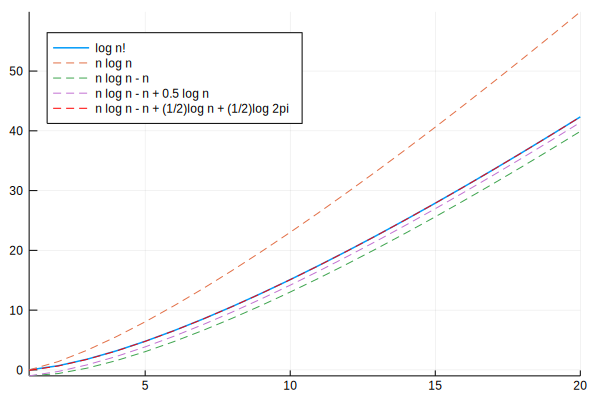

In [5]:
plot_logfactorial(1:20)

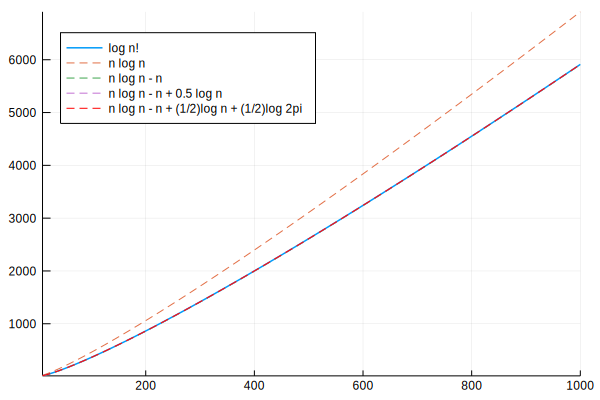

In [6]:
plot_logfactorial(10:10:1000)

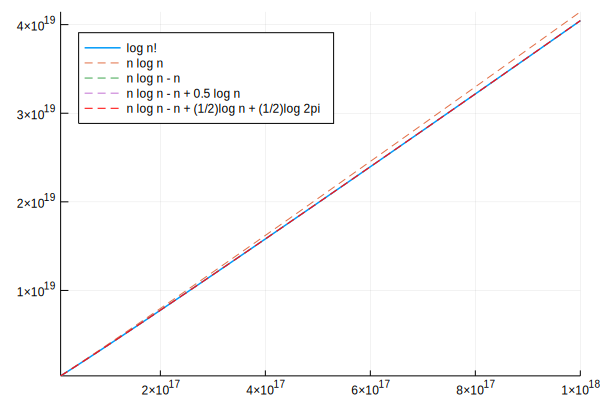

In [7]:
plot_logfactorial(10^16:10^16:10^18)

すぐ上のプロットを見れば, $n$ がこのように極めて大きな値であれば $\log n!$ の $\log n^n = n\log n$ による近似もそう悪くないことがわかる.

## 上限と下限と上極限と下極限

### 上限と下限

$X$ は空でない実数の集合であると仮定する.

実数 $M$ で任意の $x\in X$ について $x\leqq M$ を満たすものを実数の集合 $X$ の**上界**(upper bound)と呼ぶ. 実数 $m$ で任意の $x\in X$ について $m\leqq x$ を満たすものを $X$ の**下界**(lower bound)と呼ぶ.

$X$ の上界が1つ以上存在するとき, $X$ は**上に有界**(bounded from above)であると言い, $X$ の下界が1つ以上存在するとき, $X$ は**下に有界**(bounded from below)であると言う.  $X$ が上に有界かつ下に有界であるとき, $X$ は**有界**(bounded)であると言う.

$X$ の上に有界ば $X$ の上界全体の集合の中に最小値が存在する. その最小値を $X$ の**最小上界**(least upper bound)もしくは**上限**(supremum)と呼び.  同様に, $X$ が下に有界ならば $X$ の下界全体の集合の中に最大値が存在する. その最大値を $X$ の**最大下界**(greatest lower bound)または**下限**(infimum)と呼ぶ. $X$ の上限と下限をそれぞれ

$$
\sup X, \quad \inf X
$$

と書く. 実数値函数 $f(x)$ による集合 $X$ の像 $f(X)=\{\,f(x)\mid x\in X\,\}$ の上限と下限をそれぞれ

$$
\sup f(X) = \sup_{x\in X}f(x), \quad \inf f(X) = \inf_{x\in X}f(x)
$$

と書く. 

$X$ が上に有界でないときには $X$ は(有限な)上限を持たないが, $\sup X = \infty$ と書くことがある. 同様に $X$ が下に有界でないときには $X$ は(有限な)下限を持たないが, $\inf X=-\infty$ と書くことがある.

$X$ に最大値 $\max X$ が存在するとき, $\sup X = \max X$ となる. 同様に $X$ に最小値 $\min X$ が存在するとき, $\inf X = \min X$ となる.

**上限と下限の便利なところ:** $X$ に最大値や最小値が存在しなくても, 上限と下限は値として $\pm\infty$ を許せば常に存在する. 上限と下限は, 最大値や最小値が存在しないときに, それらに代わるものとして用いることができる場合が結構ある. $\QED$

**例:** 開区間 $X = (0,1)$ には最小値も最大値も存在しない. $\inf X = 0$, $\sup X = 1$ となる. $\QED$

**例:** $X=\{1,1/2,1/3,\ldots\}$ には最大値 $1$ は存在するが, 最小値は存在しない. このとき, 

$$
\sup X = \sup_{n=1,2,3,\ldots}\frac{1}{n} = \max_{n=1,2,3,\ldots}\frac{1}{n} = 1, \quad
\inf X = \inf_{n=1,2,3,\ldots}\frac{1}{n} = 0.
\qquad \QED
$$

**例:** $X = \{1,2,3,\ldots\}$ は上に有界でないので有限の上限を持たない. 下限は最小値の $1$ になる:

$$
\sup\{1,2,3,\ldots\} = \infty, \quad
\inf\{1,2,3,\ldots\} = \min\{1,2,3,\ldots\} = 1.
$$

### 上極限と下極限

実数の集合 $X$ とその部分集合 $Y$ を考える. $X$ の上界は $Y$ の上界にもなるので, $X$ の上界の最小値は $Y$ の上界の最小値以上になる. すなわち, $\sup X\geqq \sup Y$ となる(これは図を描いて考えれば明らかだろう).  部分集合の上限はもとの集合の上限以下になる.  同様に部分集合の下限はもとの集合の下限以上になる. 

したがって, 実数列 $a_n$ に対して, 数列 $\ds\alpha_n = \inf_{k\geqq n} a_k$ は単調増加し, 数列 $\ds\beta_n = \sup_{k\geqq n} a_k$ は単調減少する. ゆえに $\pm\infty$ も収束先に含めれば, それらの数列は常に収束することになる.  それぞれの収束先を次のように書く.

$$
\liminf_{n\to\infty} a_n = \lim_{n\to\infty}\inf_{k\geqq n} a_k, \quad
\limsup_{n\to\infty} a_n = \lim_{n\to\infty}\sup_{k\geqq n} a_k.
$$

これらをそれぞれ**上極限**(limit superior), **下極限**(limit inferior)と呼ぶ. 

それぞれを $\liminf a_n$, $\limsup a_n$ と略して書くこともある.

自明に $\ds\inf_{k\geqq n} a_k\leqq \sup_{k\geqq n} a_k$ が成立しているので, 

$$
\liminf_{n\to\infty} a_n \leqq \limsup_{n\to\infty} a_n
$$

が成立している.

**定理:** 実数列 $a_n$ について

$$
-\infty < \liminf_{n\to\infty} a_n = \limsup_{n\to\infty} a_n < \infty
$$

が成立しているならば, 実数列 $a_n$ は収束して,

$$
\lim_{n\to\infty}a_n = \liminf_{n\to\infty} a_n = \limsup_{n\to\infty} a_n.
$$

**証明:** $\alpha = \liminf_{n\to\infty} a_n = \limsup_{n\to\infty} a_n$ とおき, 任意に $\eps>0$ と取って固定する.  $\alpha = \liminf_{n\to\infty} a_n$ より, $\inf_{j\geqq n} a_j$ が $n$ について単調増加することに注意すれば, ある番号 $N'$ が存在して, 

$$
\alpha - \eps \leqq \inf_{j\geqq n} a_j \leqq \alpha \quad (n\geqq N').
$$

同様に, $\sup_{j\geqq n} a_j$ が $n$ について単調減少することに注意すれば, ある番号 $N''$ が存在して, 

$$
\alpha \leqq \sup_{j\geqq n} a_j \leqq \alpha+\eps \quad (n\geqq N'').
$$

ゆえに $n=\max\{N',N''\}$ のとき,  $k\geqq n$ ならば

$$
\alpha - \eps \leqq \inf_{j\geqq n} a_k \leqq a_k\leqq \sup_{j\geqq n} a_j \leqq \alpha+\eps.
$$

これは $k\geqq n$ のとき, $|a_k - \alpha|\leqq\eps$ が成立することを意味する. したがって, 数列の収束の定義より, 数列 $a_n$ は $\alpha$ に収束する. これで示すべきことが示された. $\QED$

**上極限と下極限の便利な点:** $\lim a_n$ と違って, $\liminf a_n$ と $\limsup a_n$ は収束先として $\pm\infty$ を含めれば常に収束しているので収束性を確認せずに気軽に使うことができる.  そして上の定理より, $\liminf a_n$ と $\limsup a_n$ が一致していれば, $a_n$ は収束していて収束先はそれらと同じになる.  

だから, 以下のような使われ方をすることが多い. 実数列 $a_n$ に対して, 任意の $\eps>0$ に対して, それに依存して決まる別の数列 $A_n^{(\eps)}$ と $B_n^{(\eps)}$ で同じ値 $\alpha$ に収束するものが存在して, さらに

$$
A_n^{(\eps)} - \eps \leqq a_n \leqq B_n^{(\eps)} + \eps
$$

が成立していると仮定する. このとき, $n\to\infty$ とすると,

$$
\alpha-\eps \leqq\liminf_{n\to\infty}a_n\leqq\limsup_{n\to\infty}a_n\leqq \alpha+\eps.
$$

$\eps>0$ は幾らでも小さくできるので,

$$
\liminf_{n\to\infty}a_n = \limsup_{n\to\infty}a_n = \alpha
$$

となる. ゆえに数列 $a_n$ は $\alpha$ に収束する:

$$
\lim_{n\to\infty} a_n = \alpha.
$$

「$n\to\infty$ とすると」の段階では数列 $a_n$ が収束するかどうかわかっていないので, $\lim$ ではなく, $\liminf$ と $\limsup$ を使わなければいけない. $\QED$

**問題:** 以下の実数列の上極限を求めよ.

(1) $a_n = 10/n + (-1)^n$.

(2) $b_n = 10/n + \sin(4n)$. 

$\pi$ が無理数であることを認めて使ってよい.

**解答例:** (1) $\limsup a_n = \limsup(10/n + (-1)^n) = 1$.

(2) $\pi$ は無理数なので $a = 4/(2\pi)$ も無理数である. そのとき, $\sin(4n)=\sin(2\pi na)$. 次の問題より, 任意の $k>0$ に対して, ある正の整数 $n_k$ で $n_k a$ の小数点以下の部分と $1/4$ の距離が $1/k$ 以下になるものが存在する. そのとき, $n_ka$ の小数点以下の部分は $1/4$ に収束するので, $k\to\infty$ で $\sin(2\pi n_k a)\to \sin(2\pi(1/4))=1$ となる. これより, $\limsup b_n = 1$ となることがわかる. $\QED$

**問題:** 実数 $x$ に対して $x$ 以下の最大の整数を $\lfloor x\rfloor$ と書き, $f(x)=x-\lfloor x\rfloor$ とおく. $f(x)$ は $x$ の小数点以下の部分になっている. $a$ は無理数であるとする. そのとき, 任意の $\alpha\in[0,1)$ と $\eps>0$ に対して, ある正の整数 $n$ で $f(na)$ と $\alpha|$ の距離が $\eps$ 以下になるものが存在することを示せ.

**解答例:** $a$ は無理数なので $a,2a,3a,\ldots$ は決して整数にはならない. そして, $f(a), f(2a), f(3a),\ldots$ の中の任意の2つは決して一致しない. なぜならば, もしも $f(ma)=f(na)$, $m<n$ ならば $na-ma=(n-m)a$ が整数になって矛盾するからである.) だから, $\{f(a), f(2a), f(3a),\ldots\}$ は有限半開区間 $[0,1)$ の無限部分集合になる. ゆえにある正の整数の組 $m<n$ で $f(ma)$ と $f(na)$ の距離が $\eps$ 以下になるものが存在する. そのとき, $(n-m)a$ とそれに最も近い整数のあいだの距離は $\eps$ 以下になる. このとき, $f(k(n-m))$, $k=1,2,3,\ldots$ は $[0,1)$ の中に刻み幅が $\eps$ 以下の等差数列を作るので, 正の整数 $k$ をうまく取れば $f(k(n-m)a)$ と $\alpha$ の距離を $\eps$ 以下にできる. $\QED$

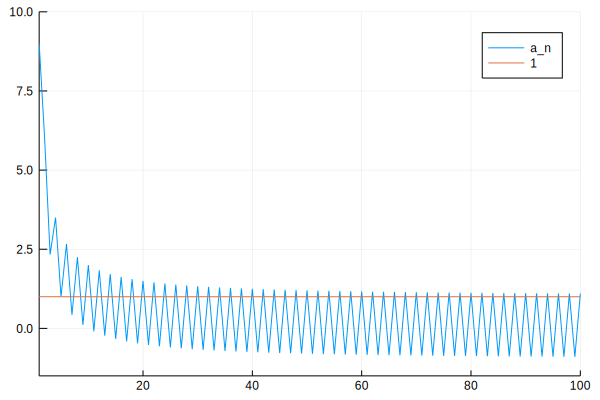

In [8]:
nmax = 100
n = 1:nmax
plot(n, 10./n .+ (-1).^n, label="a_n", ylims=(-1.5,10))
plot!(n, fill(1,nmax), label="1")

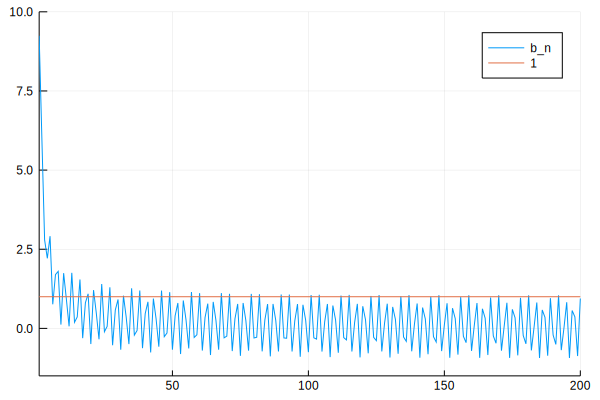

In [9]:
nmax = 200
n = 1:nmax
plot(n, 10/n + sin.(4.*n), label="b_n", ylims=(-1.5, 10))
plot!(n, fill(1,nmax), label="1")